# Prediction using Supervised ML
**Author: Ishani Kathuria**

Given a dataset with number of hours a student studied and the score they got for that test, I used supervised learning methods to train a linear regression model that would then be able to predict the scores of student based on the hours studied prior to that test.

In [1]:
# importing the necessary packages
import warnings
warnings.filterwarnings('ignore')

# for reading and manipulating the datset
import pandas as pd
import numpy as np
# for visualizing the dataset
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# importing the dataset as a pandas dataframe
data = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_scores = pd.read_csv(data)
student_scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


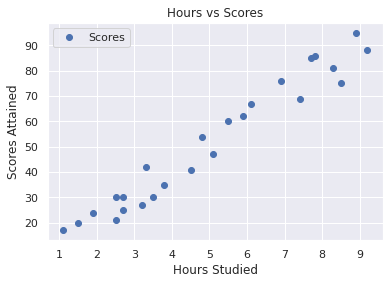

In [3]:
# plotting the hours studied vs the scores achieved
student_scores.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Attained')
plt.show();

## Train and Test

Divided the dataset into the 2 variables, x for 'Hours' and y for 'Scores' and then used the `train_test_split` function from sklearn to divide the data for training and testing the model.

In [4]:
x = np.array(student_scores['Hours']).reshape(-1,1)
y = np.array(student_scores['Scores'])

In [5]:
x.shape, y.shape

((25, 1), (25,))

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

I used a Linear Regression model as the dataset had 2 variables, on dependant on the other.

Linear Regression models are linear models which follow the equation of `y = b0 + b1*x`, where y is the variable dependant on x.

Evaluation for the model was done on 2 factors, **mean absolute error** and **r squared value (R2 score)**. The best R2 score for the model is 1.0, it can also be 0 when the model always gived a constant output. The worst model may also give a negative R2 value.

## sklearn model

Using the scikit-learn package to make the Linear Regression model.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Training the model

In [9]:
sk_model = LinearRegression().fit(x_train, y_train)

In [10]:
print('Coefficient of Determination:', sk_model.score(x_train, y_train))
print('Intercept:', sk_model.intercept_)
print('Slope:', sk_model.coef_)

Coefficient of Determination: 0.9484997422695115
Intercept: 2.3708153823418883
Slope: [9.78856669]


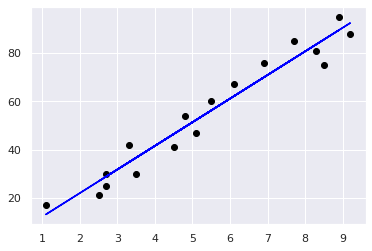

In [11]:
line = (sk_model.coef_*x_train) + sk_model.intercept_
plt.scatter(x_train, y_train, color='black')
plt.plot(x_train, line, color='blue')
plt.show();

In [12]:
y_train_pred = sk_model.predict(x_train)

In [13]:
pd.DataFrame({'Hours': x_train.reshape(x_train.shape[0]), 'Scores': y_train, 'Predicted Scores': y_train_pred})

,Hours,Scores,Predicted Scores
0,6.9,76,69.911926
1,1.1,17,13.138239
2,5.1,47,52.292505
3,7.7,85,77.742779
4,3.3,42,34.673085
5,8.3,81,83.615919
6,9.2,88,92.425629
7,6.1,67,62.081072
8,3.5,30,36.630799
9,2.7,25,28.799945


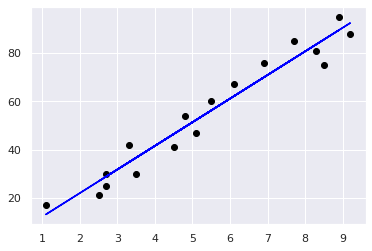

In [14]:
plt.scatter(x_train, y_train, color='black')
plt.plot(x_train, y_train_pred, color='blue')
plt.show();

In [15]:
print('Mean absolute error:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Regression score:', metrics.r2_score(y_train, y_train_pred))

Mean absolute error: 5.247062033143275
Regression score: 0.9484997422695115


### Prediction using the test set

In [16]:
y_test_pred = sk_model.predict(x_test)

In [17]:
pd.DataFrame({'Hours': x_test.reshape(x_test.shape[0]), 'Scores': y_test, 'Predicted Scores': y_test_pred})

,Hours,Scores,Predicted Scores
0,1.5,20,17.053665
1,3.2,27,33.694229
2,7.4,69,74.806209
3,2.5,30,26.842232
4,5.9,62,60.123359
5,3.8,35,39.567369
6,1.9,24,20.969092
7,7.8,86,78.721636


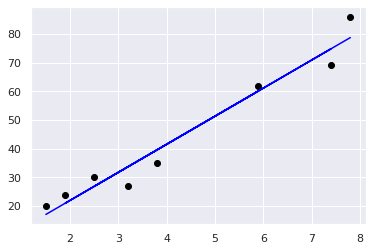

In [18]:
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_test_pred, color='blue')
plt.show();

### Prediction for 9.25 hrs/day

In [19]:
print("Predicted score for student who has studied 9.25 hrs/day:", sk_model.predict([[9.25]]))

Predicted score for student who has studied 9.25 hrs/day: [92.91505723]


### Evaluation

In [20]:
print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Regression score:', metrics.r2_score(y_test, y_test_pred))

Mean absolute error: 4.419727808027651
Regression score: 0.9568211104435257


## statsmodels.api model

Using the statsmodel.api package to make the model.

In [21]:
import statsmodels.api as sm

### Training the model

In [22]:
x_train_sm = sm.add_constant(x_train)

In [23]:
stats_model = sm.OLS(y_train, x_train_sm).fit()

In [24]:
stats_model.params

array([2.37081538, 9.78856669])

In [25]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     276.3
Date:                Thu, 04 Feb 2021   Prob (F-statistic):           4.52e-11
Time:                        21:18:13   Log-Likelihood:                -53.493
No. Observations:                  17   AIC:                             111.0
Df Residuals:                      15   BIC:                             112.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3708      3.481      0.681      0.506      -5.048       9.790
x1             9.7886      0.589     16.621      0.000       8.533      11.044
==============================================================================
Omnibus:                        4.659   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.510
Skew:                          -0.211   Prob(JB):                        0.470
Kurtosis:                       1.602   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

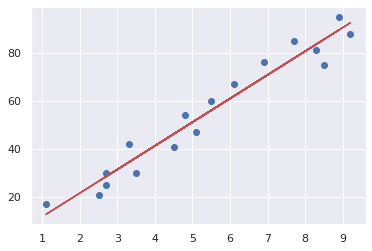

In [26]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 1.9894 + 9.8354*x_train, 'r')
plt.show();

In [27]:
y_train_pred = stats_model.predict(x_train_sm)

In [28]:
pd.DataFrame({'Hours': x_train.reshape(x_train.shape[0]), 'Scores': y_train, 'Predicted Scores': y_train_pred})

,Hours,Scores,Predicted Scores
0,6.9,76,69.911926
1,1.1,17,13.138239
2,5.1,47,52.292505
3,7.7,85,77.742779
4,3.3,42,34.673085
5,8.3,81,83.615919
6,9.2,88,92.425629
7,6.1,67,62.081072
8,3.5,30,36.630799
9,2.7,25,28.799945


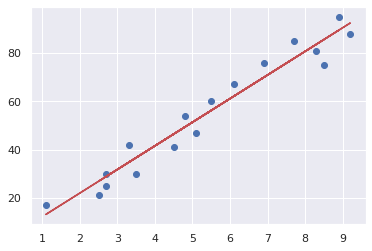

In [29]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_train_pred, 'r')
plt.show();

In [30]:
print('Mean absolute error:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Regression score:', metrics.r2_score(y_train, y_train_pred))

Mean absolute error: 5.247062033143275
Regression score: 0.9484997422695115


### Prediction using the test set

In [31]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = stats_model.predict(x_test_sm)

In [32]:
pd.DataFrame({'Hours': x_test.reshape(x_test.shape[0]), 'Scores': y_test, 'Predicted Scores': y_test_pred})

,Hours,Scores,Predicted Scores
0,1.5,20,17.053665
1,3.2,27,33.694229
2,7.4,69,74.806209
3,2.5,30,26.842232
4,5.9,62,60.123359
5,3.8,35,39.567369
6,1.9,24,20.969092
7,7.8,86,78.721636


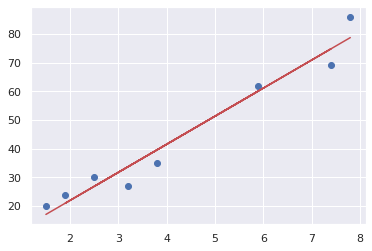

In [33]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.show();

### Prediction for 9.25 hrs/day

In [34]:
x = np.array([[1., 9.25]])

print("Predicted score for student who has studied 9.25 hrs/day:", stats_model.predict(x))

Predicted score for student who has studied 9.25 hrs/day: [92.91505723]


### Evaluation

In [35]:
print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Regression score:', metrics.r2_score(y_test, y_test_pred))

Mean absolute error: 4.419727808027645
Regression score: 0.9568211104435258


## Conclusion

I used 2 different packages to implement the Linear Regression model in python, sckit-learn or sklearn and statsmodel.api. Both models gave an identical output as the same parameters were used for training with the final.

After trying different parameters, the best evaluation for both models was: **Mean Absolute Error = 4.42 and R2 Score = 0.957**.

This model was achieved for this dataset by keeping the train by test size as 0.7:0.3 and the random state as 0.